<a href="https://colab.research.google.com/github/LinCheungS/ml_sklearn_tutorial/blob/master/%E5%A4%9A%E9%A1%B9%E5%BC%8F%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 多项式回归(Polynomial Regression)

## 原理

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200423001147.png)  
  
- 简单线性回归无法拟合nihe复杂模型
- 通过增加参数(degree)的方法进行提升
- degree = 3
$$
\begin{aligned}
&1, x_{1}, x_{2}\\
&x_{1}^{2}, x_{2}^{2}, x_{1} x_{2}\\
&x_{1}^{3}, x_{2}^{3}, x_{1}^{2} x_{2}, x_{1} x_{2}^{2}
\end{aligned}
$$

## Sklearn中实现

### 自我实现

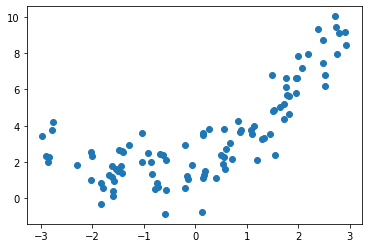

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
#生成数据
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)
#画图
plt.scatter(x, y)
plt.show()


建立线性回归模型


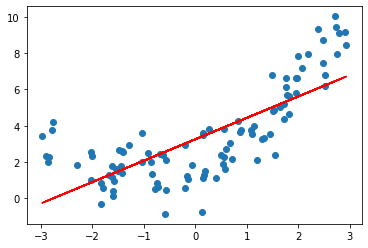

建立多项式回归模型


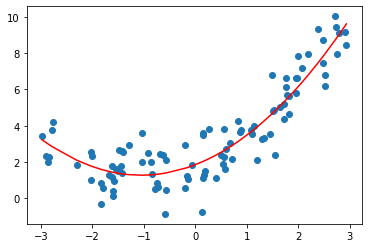

In [5]:
#线性回归
from sklearn.linear_model import LinearRegression
#建立线性回归模型
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)
#画图
print("建立线性回归模型")
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

#添加一个参数
X2 = np.hstack([X, X**2])
X2.shape
#建立多项式回归模型
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)
# 画图
print("建立多项式回归模型")
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [6]:
print(lin_reg2.coef_)
print(lin_reg2.intercept_)

[1.09973337 0.52419583]
1.8518814838901312


### 使用sklearn中的PolynomialFeatures

- 将数据PolynomialFeatures
- 生成新的数据
- 传给LinearRegression()
- degree()决定了最好几次幂  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200423001311.jpg)


In [0]:
import numpy as np 
import matplotlib.pyplot as plt
#生成数据
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# 1.确定PolynomialFeatures最高幂
poly = PolynomialFeatures(degree=2)
# 2.fit训练数据
poly.fit(X)
# 3.生成新的数据
X2 = poly.transform(X)
print("新的数据的shape"+str(X2.shape))

新的数据的shape(100, 3)


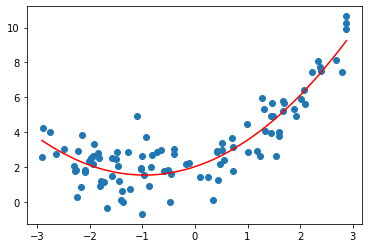

In [9]:
from sklearn.linear_model import LinearRegression
# 可视化
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

### sklearn使用Pipeline简化流程

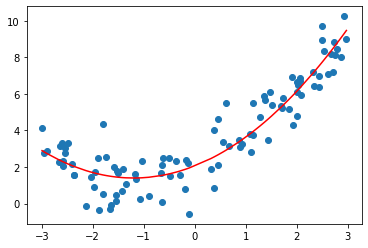

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 生成数据
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

# Pipeline的步骤
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

## 正则化(Regularization)

### 偏差bias和方差variance

- 模型的误差 = 偏差 + 方差 + 误差(噪声)

- 偏差
  - 本身假设错误
  - 非线性数据使用线性回归
  - 欠拟合

- 方差
  - 使用的模型太过复杂
  - 过拟合
  - 天生高方差算法KNN

- 降低偏差会提高方差，反之亦然

- 机器学习挑战来自于方差

- 解决方差的手段
  1. 降低模型复杂度
  2. 降维；降噪
  3. 增加样本数
  4. 使用验证数据集  
  5. **模型的正则化**  

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423024403.png)

### L2-岭回归(Ridge)

#### 原理

- 是目标函数尽可能小
$$J\left( \theta  \right){\rm{ = }}MSE(y,\hat y;\theta ) + \alpha \frac{1}{2}\sum\limits_{i = 1}^n {\theta _i^2}$$
- 后面的这项就是岭回归
$$\alpha \frac{1}{2}\sum\limits_{i = 1}^n {\theta _i^2}$$
- 岭回归通过最小化$\theta$的和，从而防止过拟合
- 与LASSO回归不同，趋向与让$\theta$为为一更更小的值

#### 代码实现

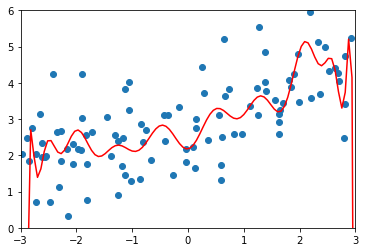

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

# 训练一个过拟合的模型
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


def PolynomialRegression(degree):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("lin_reg", LinearRegression())])


np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)


def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()


plot_model(poly_reg)

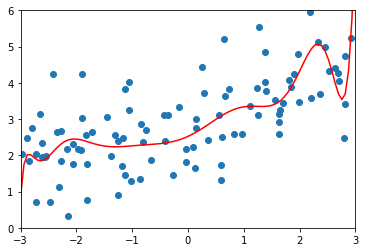

L2正则的α值为 0.0001


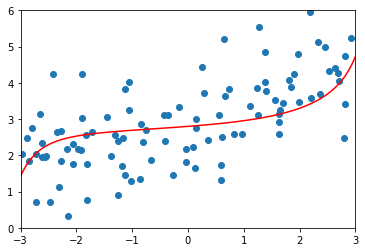

L2正则的α值为 100


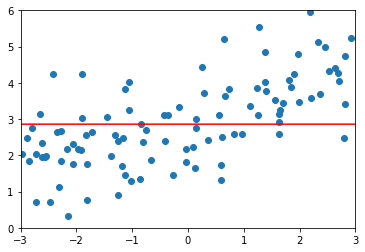

L2正则的α值为10000000,theta全为0


In [4]:
# 使用岭回归

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#pipline初始化模型
def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])
# L1正则的α值为 0.0001
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)
y1_predict = ridge1_reg.predict(X_test)
plot_model(ridge1_reg)
print("L2正则的α值为 0.0001")
# L1正则的α值为 1000
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)
y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)
plot_model(ridge3_reg)
print("L2正则的α值为 100")
# L1正则的α值为 10000000，这时theta全为0
ridge4_reg = RidgeRegression(20, 10000000)
ridge4_reg.fit(X_train, y_train)
y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)
plot_model(ridge4_reg)
print("L2正则的α值为10000000,theta全为0")

### L1-LASSO-Regression

#### 原理

- 是目标函数尽可能小
$$J\left( \theta  \right){\rm{ = }}MSE(y,\hat y;\theta ) + \alpha \frac{1}{2}\sum\limits_{i = 1}^n | {{\theta _i}}|$$
- 后面的这项LASSO Regression
$$\left| {{\theta _i}} \right|$$
- LASSO Regression通过最小化$\theta$的和，从而防止过拟合
- 与岭回归不同，趋向与让$\theta$为0


#### 代码实现

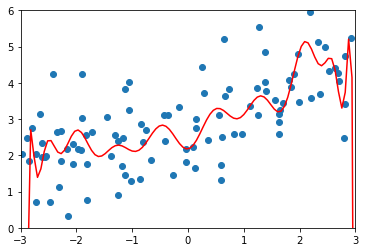

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
#生成过拟合模型
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)


def PolynomialRegression(degree):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("lin_reg", LinearRegression())])


poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_predict = poly_reg.predict(X_test)


def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()


plot_model(poly_reg)

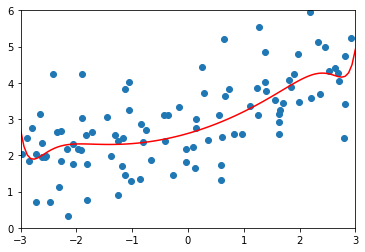

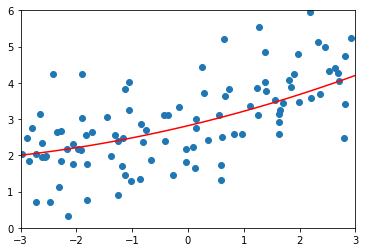

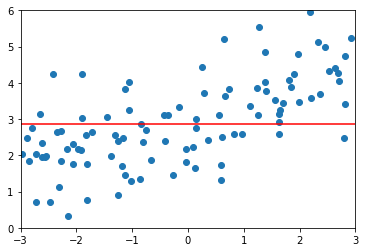

In [22]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)
y1_predict = lasso1_reg.predict(X_test)
plot_model(lasso1_reg)

lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)
y2_predict = lasso2_reg.predict(X_test)
plot_model(lasso2_reg)

lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)
y3_predict = lasso3_reg.predict(X_test)
plot_model(lasso3_reg)